In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,precision_score,recall_score
from sklearn.model_selection import KFold
import pickle
import csv
from sklearn.preprocessing import StandardScaler
import math
sns.set(rc={'figure.figsize':(15.7,12.27)})
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Crop_recommendation_Rand.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,38,38,18,26.310518,61.187491,6.294130,35.734038,mothbeans
1,74,54,38,25.655535,83.470211,7.120273,217.378858,rice
2,37,72,18,18.876150,24.540383,5.724242,105.412051,kidneybeans
3,86,40,39,25.721009,88.165136,6.207460,175.608670,jute
4,23,21,26,26.454887,93.450426,5.901496,149.222026,coconut
...,...,...,...,...,...,...,...,...
2195,76,47,42,20.083696,83.291147,5.739175,263.637218,rice
2196,37,74,15,24.923601,18.225908,5.582178,62.708917,kidneybeans
2197,32,25,9,10.356096,93.756520,7.796034,101.145695,orange
2198,6,66,15,34.931742,30.400468,6.345806,159.264983,pigeonpeas


In [3]:
df['label'].unique()

array(['mothbeans', 'rice', 'kidneybeans', 'jute', 'coconut', 'coffee',
       'blackgram', 'maize', 'orange', 'lentil', 'banana', 'chickpea',
       'grapes', 'muskmelon', 'mungbean', 'watermelon', 'papaya',
       'pigeonpeas', 'cotton', 'mango', 'pomegranate', 'apple'],
      dtype=object)

In [4]:
y = list(df.columns)
y = y[:-1]
avg = np.zeros((22,7))
for i in range(7):
    print(y[i])
    print(df.groupby(['label'])[y[i]].mean())
    print("##################################")
#x[1]

N
label
apple           20.80
banana         100.23
blackgram       40.02
chickpea        40.09
coconut         21.98
coffee         101.20
cotton         117.77
grapes          23.18
jute            78.40
kidneybeans     20.75
lentil          18.77
maize           77.76
mango           20.07
mothbeans       21.44
mungbean        20.99
muskmelon      100.32
orange          19.58
papaya          49.88
pigeonpeas      20.73
pomegranate     18.87
rice            79.89
watermelon      99.42
Name: N, dtype: float64
##################################
P
label
apple          134.22
banana          82.01
blackgram       67.47
chickpea        67.79
coconut         16.93
coffee          28.74
cotton          46.24
grapes         132.53
jute            46.86
kidneybeans     67.54
lentil          68.36
maize           48.44
mango           27.18
mothbeans       48.01
mungbean        47.28
muskmelon       17.72
orange          16.55
papaya          59.05
pigeonpeas      67.73
pomegranate     18.75
r

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


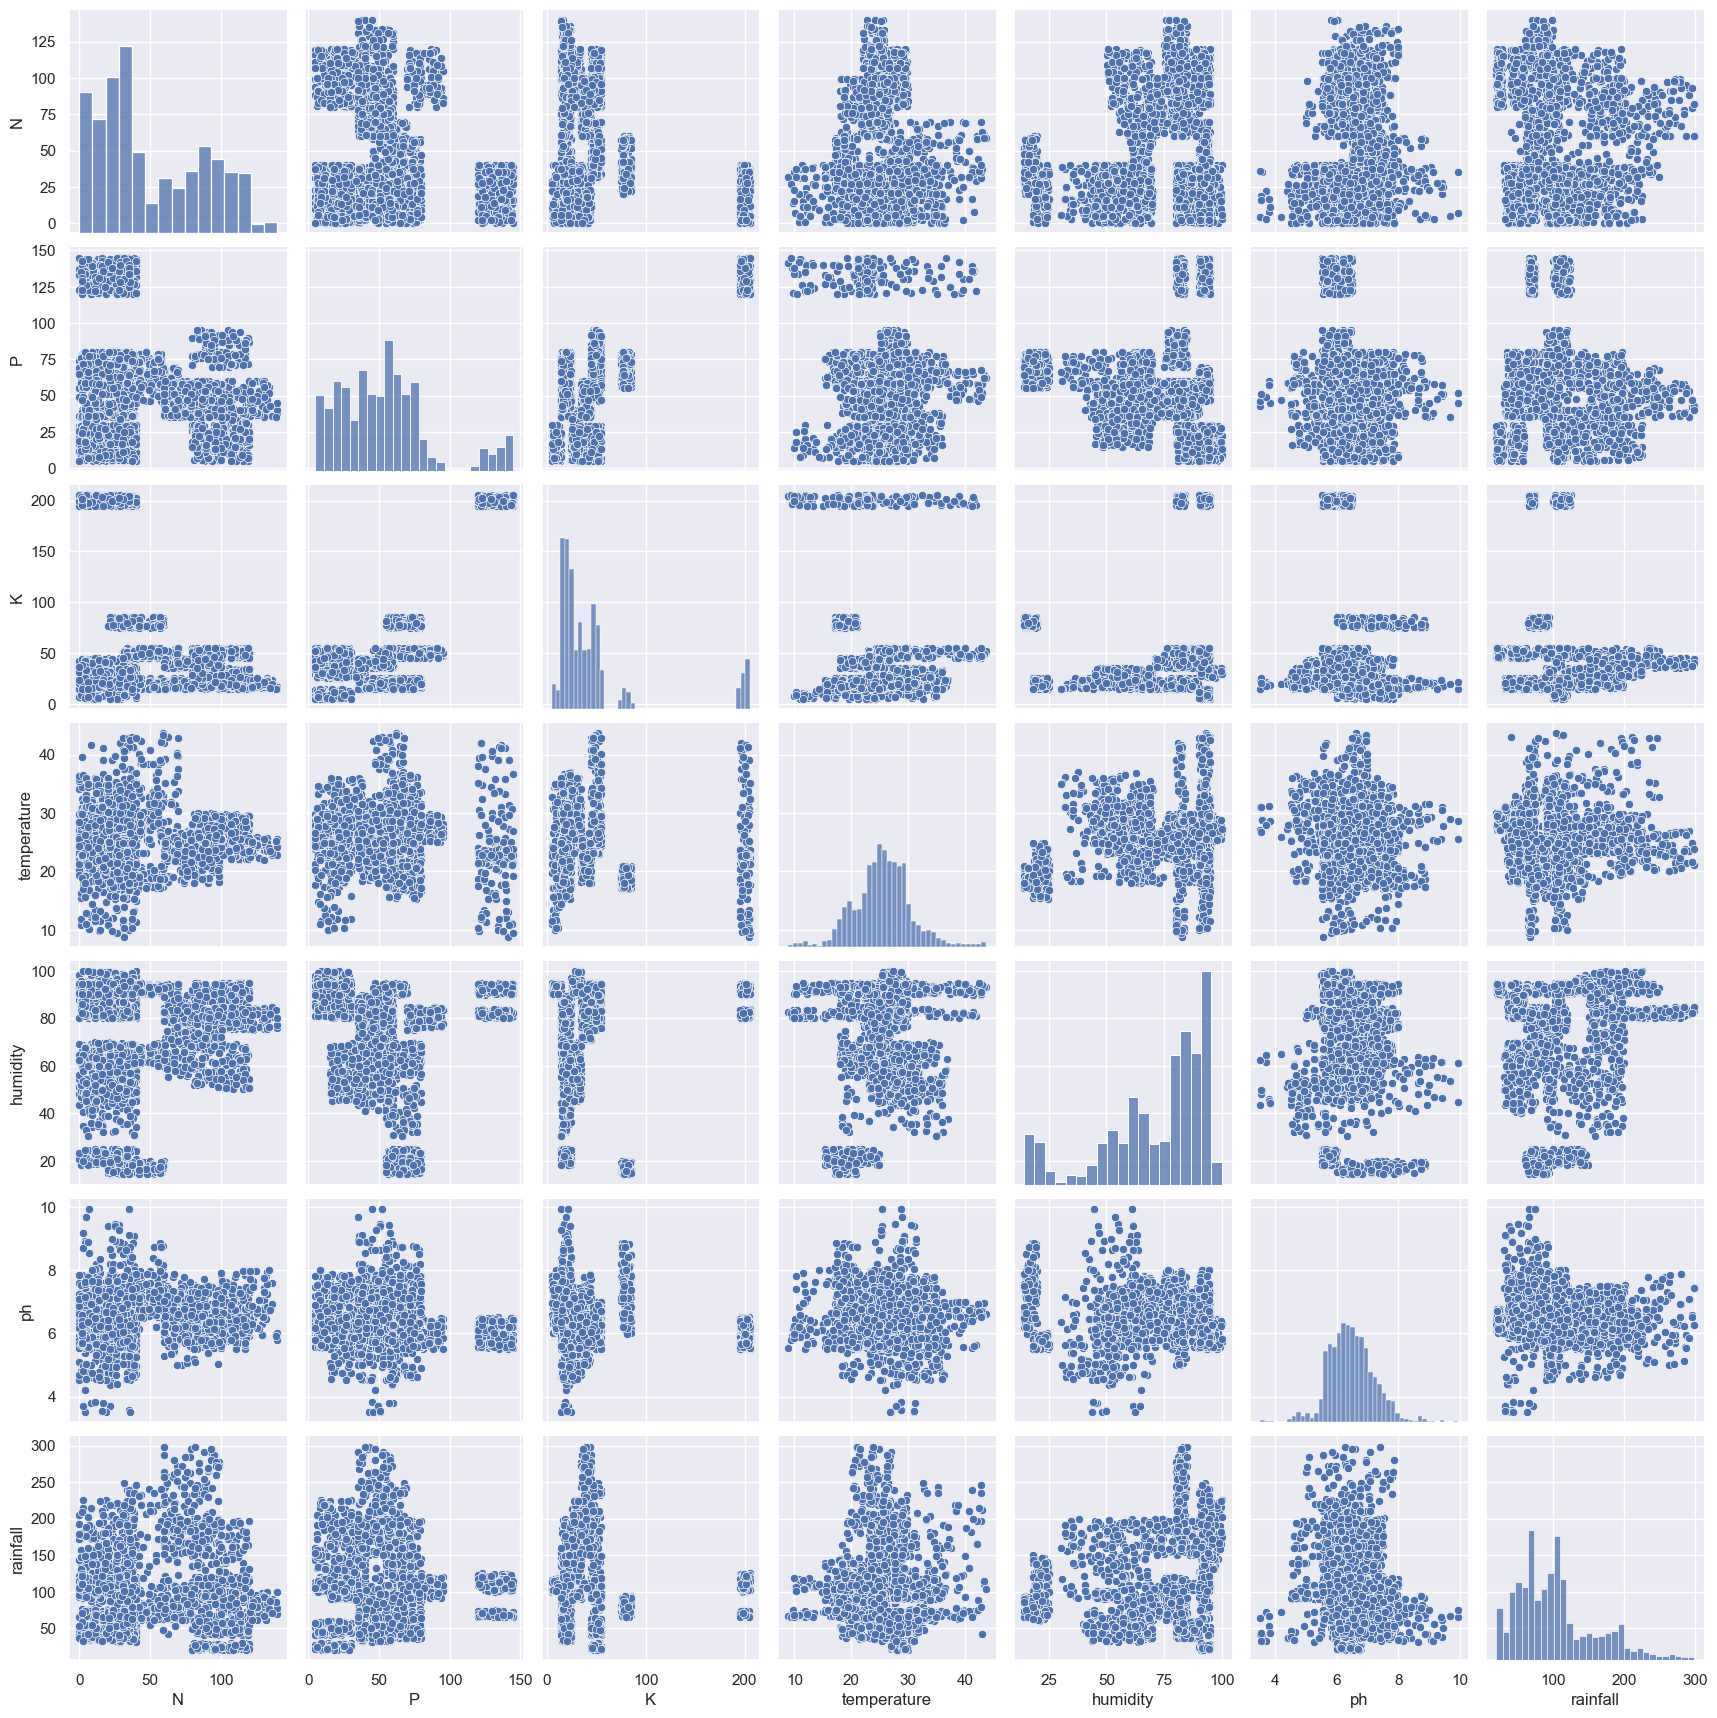

In [5]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='temperature', ylabel='humidity'>

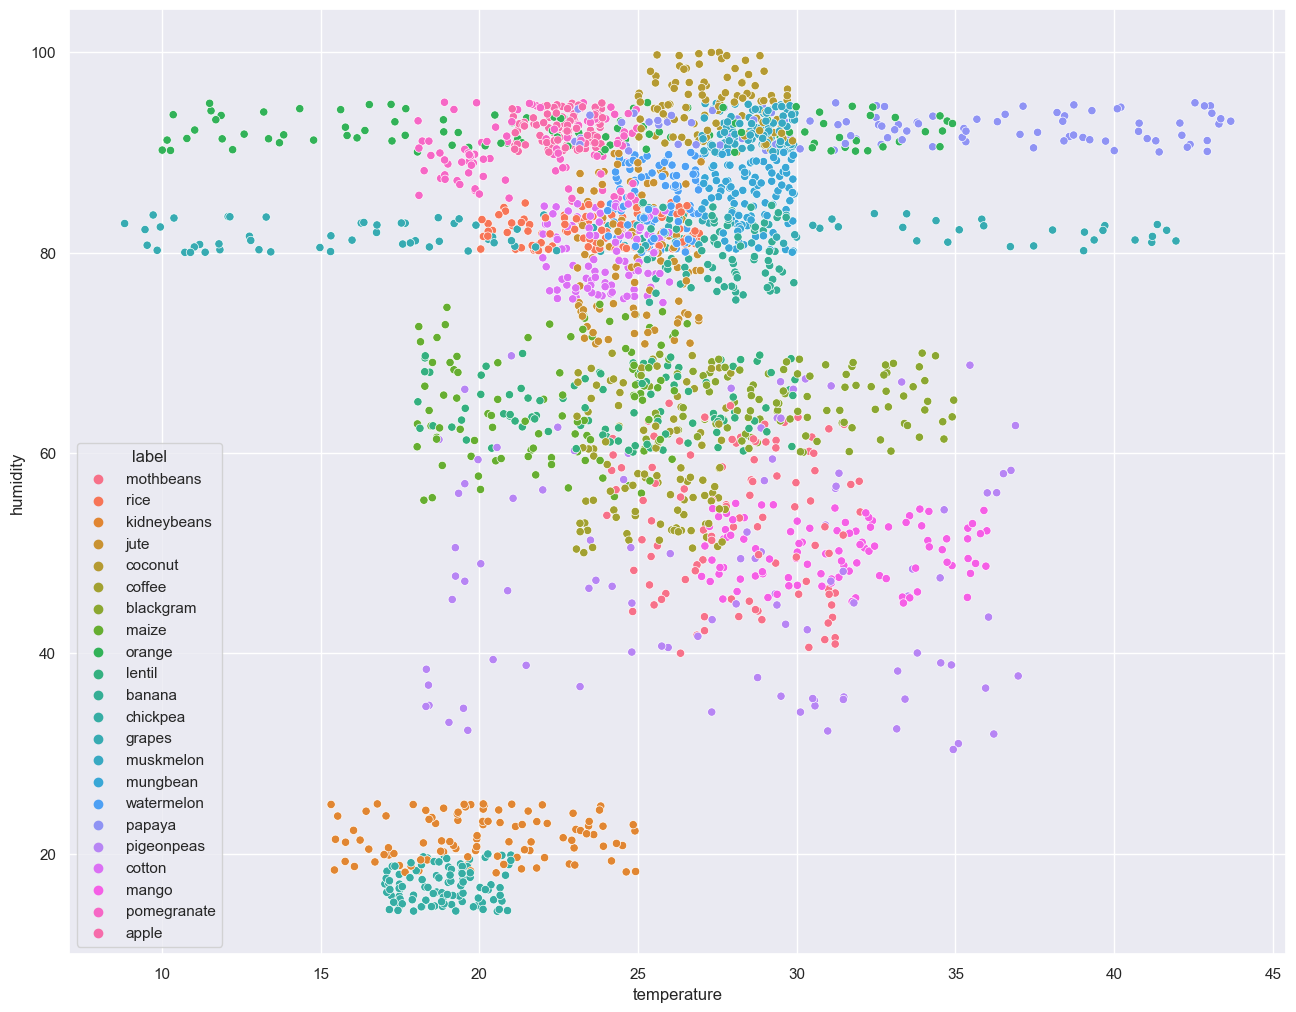

In [6]:
sns.scatterplot(data = df,x = "temperature",y = "humidity",hue = "label")

<Axes: xlabel='ph', ylabel='rainfall'>

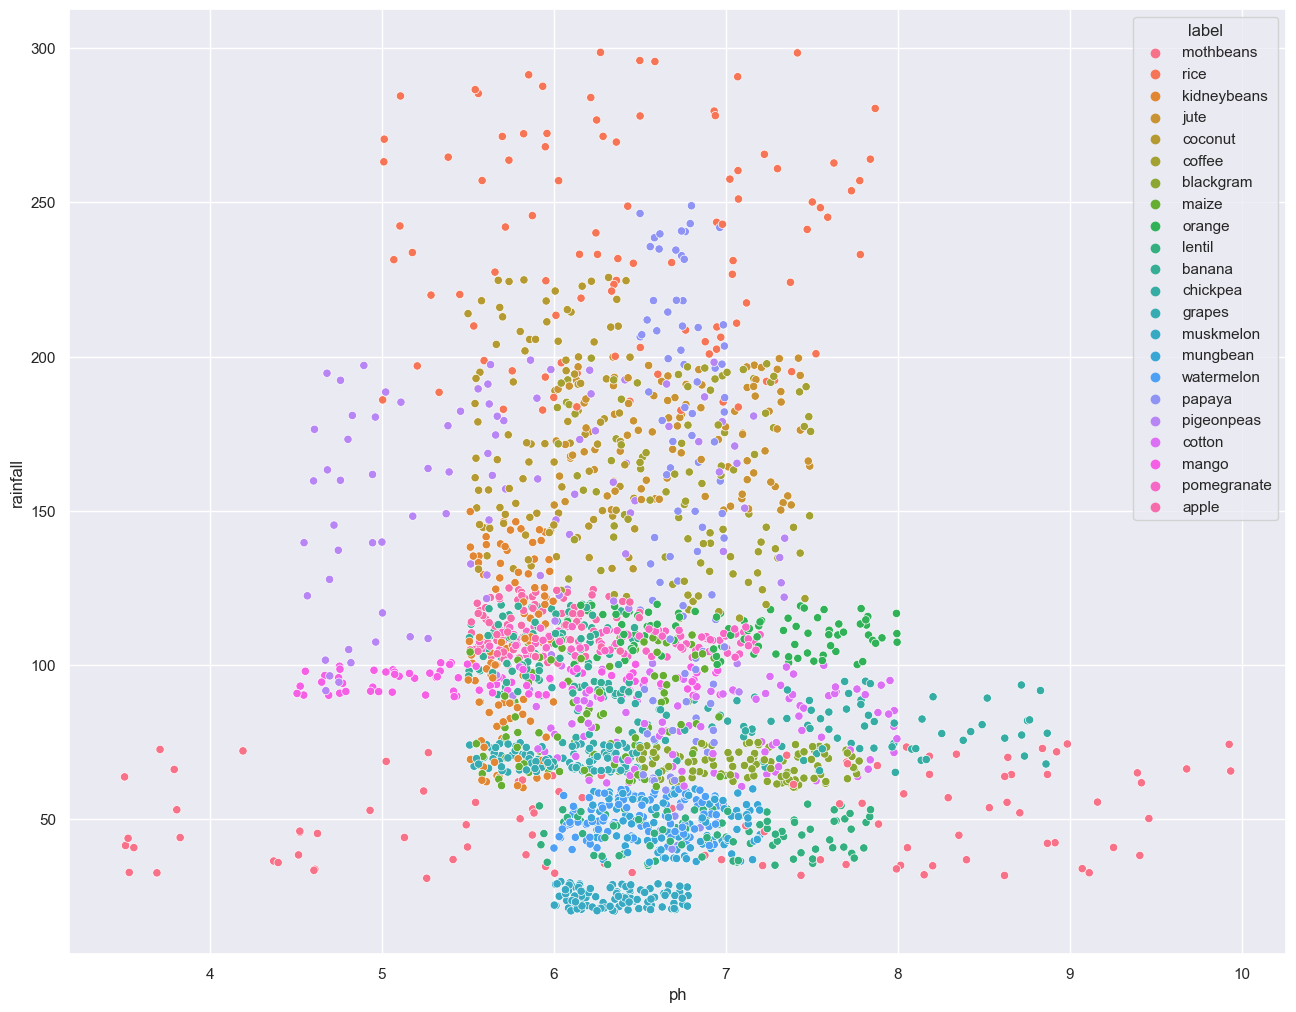

In [7]:
sns.scatterplot(data = df,x = "ph",y = "rainfall",hue = "label")

In [4]:
sns.scatterplot(data = df,x = "N",y = "P",hue = "label")

In [101]:
sns.scatterplot(data = df,x = "N",y = "K",hue = "label")

In [102]:
sns.scatterplot(data = df,x = "P",y = "K",hue = "label")

In [105]:
Corr_matrix = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [5]:
column = ["N","P","K","temperature","humidity","ph","rainfall"]
norm_data = {}
df_norm = df.copy()
for col in column:
    if col not in norm_data:
        norm_data[col] = df_norm[col].abs().max()
    df_norm[col] = df_norm[col] / df_norm[col].abs().max()
    

In [6]:
norm_data = {'N': 140,
 'P': 145,
 'K': 205,
 'temperature': 43.67549305,
 'humidity': 99.98187601,
 'ph': 9.93509073,
 'rainfall': 298.5601175}

In [7]:
df_norm

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.271429,0.262069,0.087805,0.602409,0.611986,0.633525,0.119688,mothbeans
1,0.528571,0.372414,0.185366,0.587413,0.834853,0.716679,0.728091,rice
2,0.264286,0.496552,0.087805,0.432191,0.245448,0.576164,0.353068,kidneybeans
3,0.614286,0.275862,0.190244,0.588912,0.881811,0.624802,0.588185,jute
4,0.164286,0.144828,0.126829,0.605715,0.934674,0.594005,0.499806,coconut
...,...,...,...,...,...,...,...,...
2195,0.542857,0.324138,0.204878,0.459839,0.833062,0.577667,0.883029,rice
2196,0.264286,0.510345,0.073171,0.570654,0.182292,0.561865,0.210038,kidneybeans
2197,0.228571,0.172414,0.043902,0.237115,0.937735,0.784697,0.338778,orange
2198,0.042857,0.455172,0.073171,0.799802,0.304060,0.638727,0.533444,pigeonpeas


In [8]:
y = list(df.columns)
y = y[:-1]
avg = np.zeros((22,7))
for i in range(7):
    print(y[i])
    X = df_norm.groupby(['label'])[y[i]].mean()
    X = X.values
    X = X.reshape((-1,1))
    for i in X:
        print(i[0])
    #print(X[0])
    print("##################################")

N
0.14857142857142858
0.7159285714285715
0.28585714285714287
0.28635714285714287
0.157
0.7228571428571429
0.8412142857142857
0.16557142857142856
0.56
0.14821428571428572
0.13407142857142856
0.5554285714285715
0.14335714285714285
0.15314285714285714
0.1499285714285714
0.7165714285714286
0.13985714285714285
0.35628571428571426
0.14807142857142858
0.1347857142857143
0.5706428571428571
0.7101428571428572
##################################
P
0.9256551724137931
0.5655862068965517
0.4653103448275862
0.46751724137931033
0.11675862068965519
0.19820689655172416
0.31889655172413794
0.914
0.32317241379310346
0.46579310344827585
0.47144827586206894
0.33406896551724136
0.18744827586206894
0.331103448275862
0.3260689655172414
0.12220689655172415
0.11413793103448276
0.4072413793103448
0.46710344827586203
0.12931034482758622
0.32813793103448274
0.11724137931034483
##################################
K
0.9750731707317073
0.24414634146341463
0.09385365853658537
0.3898536585365854
0.14921951219512194
0.146

In [9]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df.iloc[:,-1])
y

array([13, 20,  9, ..., 16, 18, 13])

In [10]:
le.fit(df.iloc[:,-1])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'apple': 0,
 'banana': 1,
 'blackgram': 2,
 'chickpea': 3,
 'coconut': 4,
 'coffee': 5,
 'cotton': 6,
 'grapes': 7,
 'jute': 8,
 'kidneybeans': 9,
 'lentil': 10,
 'maize': 11,
 'mango': 12,
 'mothbeans': 13,
 'mungbean': 14,
 'muskmelon': 15,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 18,
 'pomegranate': 19,
 'rice': 20,
 'watermelon': 21}

In [11]:
Label_mapping = {'apple': 0,
 'banana': 1,
 'blackgram': 2,
 'chickpea': 3,
 'coconut': 4,
 'coffee': 5,
 'cotton': 6,
 'grapes': 7,
 'jute': 8,
 'kidneybeans': 9,
 'lentil': 10,
 'maize': 11,
 'mango': 12,
 'mothbeans': 13,
 'mungbean': 14,
 'muskmelon': 15,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 18,
 'pomegranate': 19,
 'rice': 20,
 'watermelon': 21}

In [12]:
x = df_norm.iloc[:,:-1].values

In [29]:
acc_per = [[] for i in range(5)]
pres_per = [[] for i in range(5)]
recall_per = [[] for i in range(5)]
f1_score_per = [[] for i in range(5)]
spec_per = [[] for i in range(5)]

In [30]:
def specificity(y_true,y_pred):
    cm=confusion_matrix(y_true, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    Specificity = TN/(TN+FP)    
    #print(Specificity)
    return np.mean(Specificity)

In [31]:
def evaluation(ytrue,yhat):
    accuracy = accuracy_score(ytrue, yhat)
    precision =precision_score(ytrue, yhat, average = "macro")
    recall = recall_score(ytrue, yhat,average = "micro")
    f1 = f1_score(ytrue, yhat,average = "weighted")
    spec = specificity(ytrue,yhat)
    
    return accuracy, precision, recall,f1 , spec


In [32]:
def five_fold_cross_valid(x,y,model,modelNo,n_splits=5, shuffle=True):
    modelName = ["Random Forest Classifier", "Decision Tree CLassifier", "Linear Support Vector Machine Classifier","K - Neighbors Classifier"," Naive Bayes Classifier"]
    kfold = KFold(n_splits = 5, shuffle = True)
    fold_no = 1
    print("#############################################################")
    print("#############################################################")
    print("Five Cross Validation for the Model: ",modelName[modelNo])
    print("#############################################################")
    print("#############################################################")
    for train, test in kfold.split(x, y):
        clf = model    
        # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no} ...')
        # Fit data to model
        clf.fit(x[train], y[train])
        yhat = clf.predict(x[test])
        accuracy, precision, recall, f1, spec = evaluation(y[test],yhat)
        print(f'Score for fold {fold_no}: Accuracy of {accuracy}; Precision of {precision}; Recall of {recall}; f1 Score of {f1}: Specificity of {spec}\n')
    
        acc_per[modelNo].append(accuracy)
        pres_per[modelNo].append(precision)
        recall_per[modelNo].append(recall)
        f1_score_per[modelNo].append(f1)
        spec_per[modelNo].append(spec)
    
        # Increase fold number
        fold_no = fold_no + 1
   	

In [33]:
models = [RandomForestClassifier(max_depth = 10),DecisionTreeClassifier(max_depth = 10),
          SVC(kernel = 'linear',C = 1),KNeighborsClassifier(n_neighbors = 22),GaussianNB()]
modelName = ["Random Forest Classifier", "Decision Tree CLassifier", "Linear Support Vector Machine Classifier","K - Neighbors Classifier"," Naive Bayes Classifier"]
for i in range(5):
    model = models[i]
    modelNo = i
    five_fold_cross_valid(x,y,model,modelNo,n_splits=5, shuffle=True)

#############################################################
#############################################################
Five Cross Validation for the Model:  Random Forest Classifier
#############################################################
#############################################################
------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: Accuracy of 1.0; Precision of 1.0; Recall of 1.0; f1 Score of 1.0: Specificity of 1.0

------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: Accuracy of 0.9931818181818182; Precision of 0.9943873517786561; Recall of 0.9931818181818182; f1 Score of 0.993135610304728: Specificity of 0.9996732496560387

------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: Accuracy of 0.9954545454545455; Precision of 0.9943181818181818; Recall of 0.9954545454545455; f

In [34]:
acc_avg = []
pres_avg = []
recall_avg = []
f1_score_avg = []
spec_avg = []

for i in range(5):
    accAvg = sum(acc_per[i]) / 5
    presAvg = sum(pres_per[i]) / 5
    recallAvg = sum(recall_per[i]) / 5
    f1Avg = sum(f1_score_per[i]) / 5
    specAvg = sum(spec_per[i]) / 5
    
    acc_avg.append(accAvg)
    pres_avg.append(presAvg)
    recall_avg.append(recallAvg)
    f1_score_avg.append(f1Avg)
    spec_avg.append(specAvg)
    

In [35]:
eval_data = list(zip(acc_avg, pres_avg, recall_avg, f1_score_avg,spec_avg))

eval_data_df = pd.DataFrame(eval_data,index = modelName,
                            columns = ['Accuracy','Presicion','Recall','F1-score','Specificity'])

eval_data_df

,Accuracy,Presicion,Recall,F1-score,Specificity
Random Forest Classifier,0.995455,0.995423,0.995455,0.995449,0.999784
Decision Tree CLassifier,0.986364,0.986985,0.986364,0.986325,0.999351
Linear Support Vector Machine Classifier,0.966364,0.969721,0.966364,0.966158,0.998398
K - Neighbors Classifier,0.968182,0.972293,0.968182,0.967782,0.998485
Naive Bayes Classifier,0.995000,0.995143,0.995000,0.994991,0.999762


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
model = RandomForestClassifier(max_depth = 20)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [39]:
res = model.predict(X_test)
acc = accuracy_score(y_test, res)
print(acc)

0.9977272727272727


In [25]:
filename = 'Crop_Prediction_Model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [13]:
df = pd.read_csv("Crop_recommendation_Rand.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,38,38,18,26.310518,61.187491,6.294130,35.734038,mothbeans
1,74,54,38,25.655535,83.470211,7.120273,217.378858,rice
2,37,72,18,18.876150,24.540383,5.724242,105.412051,kidneybeans
3,86,40,39,25.721009,88.165136,6.207460,175.608670,jute
4,23,21,26,26.454887,93.450426,5.901496,149.222026,coconut
...,...,...,...,...,...,...,...,...
2195,76,47,42,20.083696,83.291147,5.739175,263.637218,rice
2196,37,74,15,24.923601,18.225908,5.582178,62.708917,kidneybeans
2197,32,25,9,10.356096,93.756520,7.796034,101.145695,orange
2198,6,66,15,34.931742,30.400468,6.345806,159.264983,pigeonpeas


In [14]:
column = ["N","P","K","temperature","humidity","ph","rainfall"]
norm_data = {}
df_norm = df.copy()
for col in column:
    if col not in norm_data:
        norm_data[col] = df_norm[col].abs().max()
    df_norm[col] = df_norm[col] / df_norm[col].abs().max()

In [15]:
x = df_norm.iloc[:,:-1].values
le = preprocessing.LabelEncoder()
y = le.fit_transform(df.iloc[:,-1])

In [16]:
model = pickle.load(open('Crop_Prediction_Model.pkl','rb'))

In [17]:
Label_mapping = {'apple': 0,
 'banana': 1,
 'blackgram': 2,
 'chickpea': 3,
 'coconut': 4,
 'coffee': 5,
 'cotton': 6,
 'grapes': 7,
 'jute': 8,
 'kidneybeans': 9,
 'lentil': 10,
 'maize': 11,
 'mango': 12,
 'mothbeans': 13,
 'mungbean': 14,
 'muskmelon': 15,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 18,
 'pomegranate': 19,
 'rice': 20,
 'watermelon': 21}

norm_data = {'N': 140,
 'P': 145,
 'K': 205,
 'temperature': 43.67549305,
 'humidity': 99.98187601,
 'ph': 9.93509073,
 'rainfall': 298.5601175}

In [18]:
def norm(x):
    #print(norm_data.keys())
    key = list(norm_data.keys())
    x_norm = x.copy()
    n = len(x)
    for i in range(n):
        x_norm[i] = x[i] / norm_data[key[i]]
    return np.array(x_norm)

def predict(model,arr):
    #arr = norm(arr)
    for i in arr:
        i = list(arr)
        print(i,333333)
        i = norm(x)
        i = (np.array(i).reshape(1,-1))
        print(i,2222222)
        pred = model.predict(i)
        #print(pred)
        print(le.inverse_transform(pred)[0])
    return None

def std_div(arr,arr_mean):
    deviation_sum = 0
    
    for i in range(7):
        deviation_sum += (arr[i] - arr_mean[i]) ** 2
    ssd = math.sqrt((deviation_sum)/6)
    return ssd

In [19]:
#x = [123,50,16,26.9349,68.14583,6.498052,62.1]
x = [38,38,18,26.310518,61.187491,6.294130,35.734038]
x = [20.08, 134.22, 199.89, 22.63, 92.33, 5.9, 112.65]
#x = [224,49.28,218,26.9349,68.14583,7.7,62.1]
x = [224,49.28,85,26.9349,68.14583,7.9,62.1]
 
x_norm = norm(x)
print(x_norm)
X = np.array(x_norm).reshape(1,-1)
pred = model.predict(X)
print(le.inverse_transform(pred)[0])

[1.6        0.33986207 0.41463415 0.61670512 0.68158183 0.79516133
 0.20799831]
chickpea


In [20]:
print(le.inverse_transform([13]))

['mothbeans']


In [23]:
def norm(x):
    #print(norm_data.keys())
    key = list(norm_data.keys())
    x_norm = x.copy()
    n = len(x)
    for i in range(n):
        x_norm[i] = x[i] / norm_data[key[i]]
    return np.array(x_norm)

def predict(model,arr):
    i = list(arr)
    #print(i,333333)
    i = norm(x)
    i = i.reshape(1,-1)
    #print(i,2222222)
    pred = model.predict(i)
    print(le.inverse_transform(pred)[0])
    return None
def std_div(arr,arr_mean):
    deviation_sum = 0
    
    for i in range(7):
        deviation_sum += (arr[i] - arr_mean[i]) ** 2
    ssd = math.sqrt((deviation_sum)/6)
    return ssd

In [26]:
csv_filename = 'Test Values.csv'
col = ['ï»¿label', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
avg_val_dict = {}
with open(csv_filename) as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row[col[0]] not in avg_val_dict:
            val = []
            for i in range(1,8):
                val.append(float(row[col[i]]))                
            avg_val_dict[row[col[0]]] = val
        #print(row)
#print(avg_val_dict)
for i in avg_val_dict.keys():
    avg_val_dict[i] = list(norm(avg_val_dict[i]))
#print("################################")
print(avg_val_dict)

{'apple': [0.1434285714285714, 0.9256551724137931, 0.9750731707317073, 0.5181395427887447, 0.9234673691336351, 0.5938546672940147, 0.37731094475470256], 'banana': [0.7159285714285715, 0.5655862068965518, 0.24414634146341463, 0.626667224309675, 0.8036456526577231, 0.603920000637981, 0.3504151889945582], 'blackgram': [0.28585714285714287, 0.4653103448275862, 0.09385365853658535, 0.6861971761987927, 0.6512180266900356, 0.7146386674216109, 0.22735789551663743], 'chickpea': [0.28635714285714287, 0.4675172413793104, 0.3898536585365854, 0.43205007390294364, 0.1686305625863001, 0.7347693341095436, 0.2681202053050505], 'coconut': [0.157, 0.11675862068965517, 0.14921951219512194, 0.627354108369934, 0.9485719190797569, 0.603920000637981, 0.5884242057213152], 'coffee': [0.7228571428571429, 0.19820689655172413, 0.1460487804878049, 0.5847672966338728, 0.5887066971429196, 0.6844426673897118, 0.5294411099633896], 'cotton': [0.8412142857142857, 0.31889655172413794, 0.09541463414634145, 0.54904932550040

In [28]:
avg_val_dict = {'apple': [0.1434285714285714, 0.9256551724137931, 0.9750731707317073, 0.5181395427887447, 0.9234673691336351, 0.5938546672940147, 0.37731094475470256], 
                'banana': [0.7159285714285715, 0.5655862068965518, 0.24414634146341463, 0.626667224309675, 0.8036456526577231, 0.603920000637981, 0.3504151889945582], 
                'blackgram': [0.28585714285714287, 0.4653103448275862, 0.09385365853658535, 0.6861971761987927, 0.6512180266900356, 0.7146386674216109, 0.22735789551663743], 
                'chickpea': [0.28635714285714287, 0.4675172413793104, 0.3898536585365854, 0.43205007390294364, 0.1686305625863001, 0.7347693341095436, 0.2681202053050505], 
                'coconut': [0.157, 0.11675862068965517, 0.14921951219512194, 0.627354108369934, 0.9485719190797569, 0.603920000637981, 0.5884242057213152], 
                'coffee': [0.7228571428571429, 0.19820689655172413, 0.1460487804878049, 0.5847672966338728, 0.5887066971429196, 0.6844426673897118, 0.5294411099633896], 
                'cotton': [0.8412142857142857, 0.31889655172413794, 0.09541463414634145, 0.5490493255004021, 0.7985447281666785, 0.6945080007336782, 0.26925900442814504], 
                'grapes': [0.16557142857142856, 0.914, 0.9761463414634147, 0.5458438665525265, 0.8188484080035818, 0.603920000637981, 0.23315237340767728], 
                'jute': [0.56, 0.32317241379310346, 0.19507317073170732, 0.5712585767821114, 0.7985447281666785, 0.6743773340457455, 0.5854432315461559], 
                'kidneybeans': [0.14821428571428572, 0.4657931034482759, 0.09780487804878049, 0.4604412817269844, 0.21613917304210825, 0.573724000606082, 0.354769420935802], 
                'lentil': [0.13407142857142856, 0.47144827586206894, 0.0946829268292683, 0.5611842772316454, 0.6481174647444986, 0.6945080007336782, 0.15300101159693574], 
                'maize': [0.5554285714285715, 0.33406896551724136, 0.09653658536585366, 0.5124155089532526, 0.6510179904354848, 0.6240506673259137, 0.28389592256909535], 
                'mango': [0.14335714285714285, 0.18744827586206897, 0.14595121951219514, 0.7145883840228336, 0.5015909082860587, 0.5837893339500483, 0.3171890498736825], 
                'mothbeans': [0.15314285714285716, 0.3311034482758621, 0.0986829268292683, 0.645442055290089, 0.5316963645959497, 0.6844426673897118, 0.17145625620943827], 
                'mungbean': [0.1499285714285714, 0.3260689655172414, 0.09692682926829269, 0.6529977799529386, 0.8550549700772713, 0.6743773340457455, 0.162111404581692], 
                'muskmelon': [0.7165714285714285, 0.12220689655172413, 0.24429268292682926, 0.6562032389008142, 0.9235673872609105, 0.63411600066988, 0.08266341869992062], 
                'orange': [0.13985714285714285, 0.11413793103448276, 0.04882926829268293, 0.5211160403832007, 0.921867079097229, 0.7045733340776446, 0.3700092327301553], 
                'papaya': [0.3562857142857143, 0.4072413793103448, 0.24409756097560975, 0.7720576837311742, 0.9241674960245628, 0.6743773340457455, 0.47769273804629986], 
                'pigeonpeas': [0.14807142857142858, 0.4671034482758621, 0.09897560975609755, 0.6351387943862032, 0.48068711968550315, 0.573724000606082, 0.5006026968756134], 
                'pomegranate': [0.1347857142857143, 0.12931034482758622, 0.19614634146341464, 0.49982263451517, 0.9014133720694126, 0.6441813340138465, 0.36012847563271744], 
                'rice': [0.5706428571428571, 0.32813793103448274, 0.19448780487804876, 0.5421804848978116, 0.8228491330945972, 0.6441813340138465, 0.7910634614484301], 
                'watermelon': [0.7101428571428572, 0.11724137931034483, 0.24497560975609756, 0.5859121034009712, 0.8517543718771836, 0.6542466673578128, 0.17008299844335373]
               }

In [80]:
x = [111,40,40,30,60,7,120]
x_norm = list(norm(x))
print(x_norm)
print(avg_val_dict['coffee'])
std_div(x_norm,avg_val_dict['coffee'])

[0.7928571428571428, 0.27586206896551724, 0.1951219512195122, 0.6868840602590518, 0.6001087636523135, 0.7045733340776446, 0.40192910226865786]
[0.7228571428571429, 0.19820689655172413, 0.1460487804878049, 0.5847672966338728, 0.5887066971429196, 0.6844426673897118, 0.5294411099633896]


0.08222012960125853

In [30]:
test_df = pd.read_csv("ph and npk of soil.csv")
test_df = test_df.iloc[:,:7]
X = test_df.values
for i in range(len(X)):
    x_norm = norm(list(X[i]))
    x_norm_rs = x_norm.reshape(1,-1)
    pred = model.predict(x_norm_rs)
    res = le.inverse_transform(pred)[0]
    #print(avg_val_dict[str(res)])
    std = std_div(x_norm,avg_val_dict[str(res)])
    print(X[i],res,std)    

[244.          49.28        85.          26.93489583  68.14583333
   7.9         62.1       ] chickpea 0.6380674582295998
[224.          49.28       218.          26.93489583  68.14583333
   7.7         62.1       ] chickpea 0.6452505831346915
[168.          14.5        176.          26.93489583  68.14583333
   7.8         62.1       ] watermelon 0.3329615497771793
[72.         45.         51.         26.93489583 68.14583333  7.6
 62.1       ] papaya 0.18179584744985228


In [32]:
object= StandardScaler()
 
# Splitting the independent and dependent variables
i_data = test_df
 
# standardization 
scale = object.fit_transform(i_data) 
print(scale)

[[ 1.00425963  0.6712387  -0.70610993  0.          0.          1.34164079
   0.        ]
 [ 0.70448064  0.6712387   1.27099788  0.          0.         -0.4472136
   0.        ]
 [-0.13490055 -1.71951214  0.64664804  0.          0.          0.4472136
   0.        ]
 [-1.57383972  0.37703474 -1.21153599  0.          0.         -1.34164079
   0.        ]]


In [33]:
csv_filename = 'Test Values_norm.csv'
col = ['label', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
avg_val_dict_norm = {}
with open(csv_filename) as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row[col[0]] not in avg_val_dict_norm:
            val = []
            for i in range(1,8):
                val.append(float(row[col[i]]))                
            avg_val_dict_norm[row[col[0]]] = val